## Import Libraries


In [0]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [0]:
accident = pd.read_csv("/content/drive/My Drive/Colab Notebooks/CMPE255/US_Accidents_Dec19.csv")

## Various aspects of raw dataframe

In [39]:
accident.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [40]:
accident.shape

(2974335, 49)

## No duplicates to report

In [41]:
accident.drop_duplicates().shape

(2974335, 49)

Remove any rows with NA's

In [42]:
accident.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


## Create two dataframes
- Df for Decision Tree
- Df for Apriori

In [0]:
dropColumns = ['ID', 'Country', 'Source', 'TMC', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lng', 'End_Lat', 
               'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State', 'Zipcode', 
               'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop']

dropColumnsForAp = ['ID', 'Country', 'Source', 'TMC', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lng', 'End_Lat',  
                    'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State', 'Zipcode', 
                   'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Severity', 'Distance(mi)', 'Country', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 
                    'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)','Precipitation(in)','Weather_Condition', 
                    'Sunrise_Sunset','Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']


accident_df = accident.drop(columns=dropColumns, axis = 1)
obstacle_df = accident.drop(columns=dropColumnsForAp, axis = 1)


In [0]:
accident_df.dropna(axis=0, inplace=True)
obstacle_df.dropna(axis=0, inplace=True)

## Drop Na's

In [45]:
print("Accident_Df: ", accident_df.shape)
print("Obstacle_Df: ", obstacle_df.shape)

Accident_Df:  (779721, 15)
Obstacle_Df:  (2974335, 13)


In [0]:
accident_df = accident_df.drop(columns=['Wind_Direction'])

## Discretize the following continuous valued columns

In [0]:

accident_df['Distance(mi)'].max() #0 - 185
accident_df['Distance(mi)'] = pd.cut(accident_df['Distance(mi)'], bins=[-1,30,100,184], labels=['short', 'medium', 'far'])



In [0]:
accident_df['Temperature(F)'].max() #-24 - 115.0
accident_df['Temperature(F)'] = pd.cut(accident_df['Temperature(F)'], bins=[-25,25,60,95,116], labels=['freezing', 'cold', 'normal','vhot'])

In [0]:
accident_df['Wind_Chill(F)'].min() #-52.7 - 115.0
accident_df['Wind_Chill(F)'] = pd.cut(accident_df['Wind_Chill(F)'], bins=[-53,25,60,95,116], labels=['freezing', 'cold', 'normal','vhot'])

In [0]:
accident_df['Humidity(%)'].max() #1.0 - 100.0
accident_df['Humidity(%)'] = pd.cut(accident_df['Humidity(%)'], bins=[-1,33, 66, 101], labels=['low', 'medium', 'high'])

In [0]:
accident_df['Pressure(in)'].min() #19.48 - 31.1
accident_df['Pressure(in)'] = pd.cut(accident_df['Pressure(in)'], bins=[18,23, 28, 32], labels=['low', 'medium', 'high'])

In [0]:
accident_df['Visibility(mi)'].max() #0.0 - 90
accident_df['Visibility(mi)'] = pd.cut(accident_df['Visibility(mi)'], bins=[-1,33, 66, 91], labels=['poor', 'so-so', 'good'])

In [0]:
accident_df['Wind_Speed(mph)'].min() #0.0 - 255
accident_df['Wind_Speed(mph)'] = pd.cut(accident_df['Wind_Speed(mph)'], bins=[-1,5, 15, 30,  66, 100, 255], labels=['none','vlow', 'low', 'med', 'high', 'vhigh'])

In [0]:
accident_df['Precipitation(in)'].max() #0.0 - 25
accident_df['Precipitation(in)'] = pd.cut(accident_df['Precipitation(in)'], bins=[-1,5, 15, 25,  31], labels=[ 'low', 'med', 'high', 'vhigh'])

In [0]:
yDrop = ['Distance(mi)',	'Temperature(F)',	'Wind_Chill(F)',	'Humidity(%)'	,'Pressure(in)','Visibility(mi)',	'Wind_Speed(mph)','Precipitation(in)',	'Weather_Condition',	'Sunrise_Sunset',	'Civil_Twilight',
        	'Nautical_Twilight',	'Astronomical_Twilight']

y = accident_df.drop(yDrop, axis=1)
x = accident_df.drop(['Severity'], axis=1)

y = pd.get_dummies(y)
x = pd.get_dummies(x, ['Distance(mi)',	'Temperature(F)',	'Wind_Chill(F)',	'Humidity(%)'	,'Pressure(in)','Visibility(mi)',	'Wind_Speed(mph)','Precipitation(in)',	'Weather_Condition',	'Sunrise_Sunset',	'Civil_Twilight',
        	'Nautical_Twilight',	'Astronomical_Twilight'])

## Split dataset into Train and test,

In [0]:
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(x, y, test_size=0.2, random_state=41)


## Implement Sklearn Decision Tree Classifier

In [0]:
from sklearn import tree

[Text(167.4, 181.2, 'X[40] <= 0.5\ngini = 0.42\nsamples = 623776\nvalue = [149, 448354, 156481, 18792]'),
 Text(83.7, 108.72, 'X[20] <= 0.5\ngini = 0.441\nsamples = 372630\nvalue = [89, 258961, 101897, 11683]'),
 Text(41.85, 36.23999999999998, 'gini = 0.456\nsamples = 256659\nvalue = [55, 173817, 74481, 8306]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.404\nsamples = 115971\nvalue = [34, 85144, 27416, 3377]'),
 Text(251.10000000000002, 108.72, 'X[11] <= 0.5\ngini = 0.383\nsamples = 251146\nvalue = [60, 189393, 54584, 7109]'),
 Text(209.25, 36.23999999999998, 'gini = 0.393\nsamples = 208897\nvalue = [51, 155709, 46899, 6238]'),
 Text(292.95, 36.23999999999998, 'gini = 0.331\nsamples = 42249\nvalue = [9, 33684, 7685, 871]')]

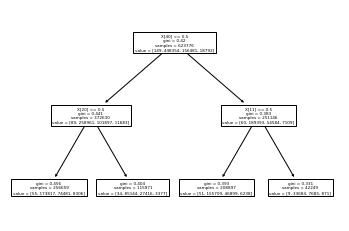

In [58]:
clf2 = DecisionTreeClassifier(max_depth=2)
clf2 = clf2.fit(X_TRAIN, Y_TRAIN)
tree.plot_tree(clf2) 

[Text(167.4, 195.696, 'X[40] <= 0.5\ngini = 0.42\nsamples = 623776\nvalue = [149, 448354, 156481, 18792]'),
 Text(83.7, 152.208, 'X[20] <= 0.5\ngini = 0.441\nsamples = 372630\nvalue = [89, 258961, 101897, 11683]'),
 Text(41.85, 108.72, 'X[79] <= 0.5\ngini = 0.456\nsamples = 256659\nvalue = [55, 173817, 74481, 8306]'),
 Text(20.925, 65.232, 'X[138] <= 0.5\ngini = 0.449\nsamples = 233866\nvalue = [49, 160153, 66396, 7268]'),
 Text(10.4625, 21.744, 'gini = 0.442\nsamples = 210098\nvalue = [42, 145368, 59050, 5638]'),
 Text(31.387500000000003, 21.744, 'gini = 0.513\nsamples = 23768\nvalue = [7, 14785, 7346, 1630]'),
 Text(62.775000000000006, 65.232, 'X[137] <= 0.5\ngini = 0.513\nsamples = 22793\nvalue = [6, 13664, 8085, 1038]'),
 Text(52.3125, 21.744, 'gini = 0.561\nsamples = 4084\nvalue = [0, 2051, 1738, 295]'),
 Text(73.2375, 21.744, 'gini = 0.498\nsamples = 18709\nvalue = [6, 11613, 6347, 743]'),
 Text(125.55000000000001, 108.72, 'X[42] <= 0.5\ngini = 0.404\nsamples = 115971\nvalue = [3

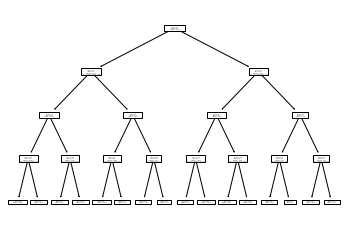

In [59]:
clf4 = DecisionTreeClassifier(max_depth=4)
clf4 = clf4.fit(X_TRAIN, Y_TRAIN)
tree.plot_tree(clf4) 

[Text(167.4, 201.90857142857143, 'X[40] <= 0.5\ngini = 0.42\nsamples = 623776\nvalue = [149, 448354, 156481, 18792]'),
 Text(83.7, 170.84571428571428, 'X[20] <= 0.5\ngini = 0.441\nsamples = 372630\nvalue = [89, 258961, 101897, 11683]'),
 Text(41.85, 139.78285714285715, 'X[79] <= 0.5\ngini = 0.456\nsamples = 256659\nvalue = [55, 173817, 74481, 8306]'),
 Text(20.925, 108.72, 'X[138] <= 0.5\ngini = 0.449\nsamples = 233866\nvalue = [49, 160153, 66396, 7268]'),
 Text(10.4625, 77.65714285714284, 'X[35] <= 0.5\ngini = 0.442\nsamples = 210098\nvalue = [42, 145368, 59050, 5638]'),
 Text(5.23125, 46.59428571428572, 'X[95] <= 0.5\ngini = 0.449\nsamples = 161877\nvalue = [34, 110613, 46823, 4407]'),
 Text(2.615625, 15.531428571428563, 'gini = 0.455\nsamples = 122113\nvalue = [23, 82504, 36217, 3369]'),
 Text(7.846875000000001, 15.531428571428563, 'gini = 0.428\nsamples = 39764\nvalue = [11, 28109, 10606, 1038]'),
 Text(15.693750000000001, 46.59428571428572, 'X[5] <= 0.5\ngini = 0.416\nsamples = 48

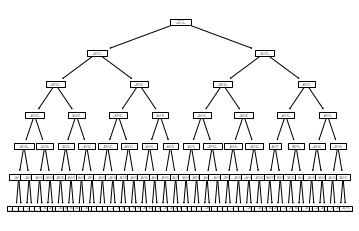

In [60]:
clf6 = DecisionTreeClassifier(max_depth=6)
clf6 = clf6.fit(X_TRAIN, Y_TRAIN)
tree.plot_tree(clf6) 

[Text(177.95243553008595, 205.35999999999999, 'X[40] <= 0.5\ngini = 0.42\nsamples = 623776\nvalue = [149, 448354, 156481, 18792]'),
 Text(95.60146848137536, 181.2, 'X[20] <= 0.5\ngini = 0.441\nsamples = 372630\nvalue = [89, 258961, 101897, 11683]'),
 Text(51.20329512893983, 157.04, 'X[79] <= 0.5\ngini = 0.456\nsamples = 256659\nvalue = [55, 173817, 74481, 8306]'),
 Text(30.09842406876791, 132.88, 'X[138] <= 0.5\ngini = 0.449\nsamples = 233866\nvalue = [49, 160153, 66396, 7268]'),
 Text(15.348997134670487, 108.72, 'X[35] <= 0.5\ngini = 0.442\nsamples = 210098\nvalue = [42, 145368, 59050, 5638]'),
 Text(7.6744985673352435, 84.56, 'X[95] <= 0.5\ngini = 0.449\nsamples = 161877\nvalue = [34, 110613, 46823, 4407]'),
 Text(3.8372492836676217, 60.400000000000006, 'X[7] <= 0.5\ngini = 0.455\nsamples = 122113\nvalue = [23, 82504, 36217, 3369]'),
 Text(1.9186246418338109, 36.24000000000001, 'X[42] <= 0.5\ngini = 0.45\nsamples = 109821\nvalue = [21, 74787, 32223, 2790]'),
 Text(0.9593123209169054,

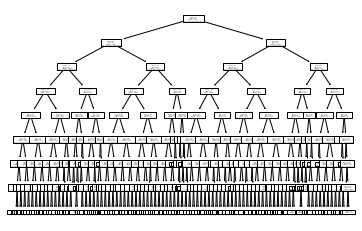

In [61]:
clf8 = DecisionTreeClassifier(max_depth=8)
clf8 = clf8.fit(X_TRAIN, Y_TRAIN)
tree.plot_tree(clf8) 

## Testing accuract for each level of depth

In [62]:
a2 = accuracy_score(Y_TEST, clf2.predict(X_TEST))
a2

0.7170925646862676

In [63]:
a4 = accuracy_score(Y_TEST, clf4.predict(X_TEST))
a4

0.7171310397896694

In [64]:
a6 = accuracy_score(Y_TEST, clf6.predict(X_TEST))
a6

0.7171310397896694

In [65]:
a8 = accuracy_score(Y_TEST, clf8.predict(X_TEST))
a8

0.7171887524447722

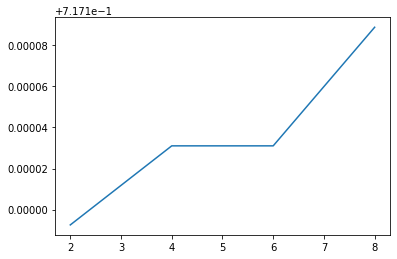

In [66]:
plt.plot([2,4, 6, 8], [a2, a4, a6, a8])

# Apriori Algorithm

In [67]:
frq_items = apriori(obstacle_df, min_support=0.025, use_colnames=True, max_len=None)
display(frq_items)

,support,itemsets
0,0.069794,(Crossing)
1,0.080168,(Junction)
2,0.169242,(Traffic_Signal)
3,0.053246,"(Crossing, Traffic_Signal)"


In [0]:
rules = association_rules(frq_items, metric='lift', min_threshold=1, support_only=False)

In [69]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Crossing),(Traffic_Signal),0.069794,0.169242,0.053246,0.762898,4.507729,0.041433,3.503800
1,(Traffic_Signal),(Crossing),0.169242,0.069794,0.053246,0.314611,4.507729,0.041433,1.357195
